In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Dataset
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as z:
    z.extractall()


In [3]:
folder = 'brain_tumor_dataset/yes/'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)
    destination = os.path.join(folder, "Y_" + str(count) + ".jpg")
    os.rename(source, destination)
    count += 1

print("All files are renamed in the yes dir.")

All files are renamed in the yes dir.


In [4]:
folder = 'brain_tumor_dataset/no/'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)
    destination = os.path.join(folder, "N_" + str(count) + ".jpg")
    os.rename(source, destination)
    count += 1

print("All files are renamed in the no dir.")

All files are renamed in the no dir.


In [5]:
# EDA(Exploratory Data Analysis)

In [6]:
# For 'yes' directory
yes_dir = "brain_tumor_dataset/yes/"
list_yes = os.listdir(yes_dir)
number_files_yes = len(list_yes)
print(number_files_yes)

# For 'no' directory
no_dir = "brain_tumor_dataset/no/"
list_no = os.listdir(no_dir)
number_files_no = len(list_no)
print(number_files_no)


155
98


In [7]:
# Plot

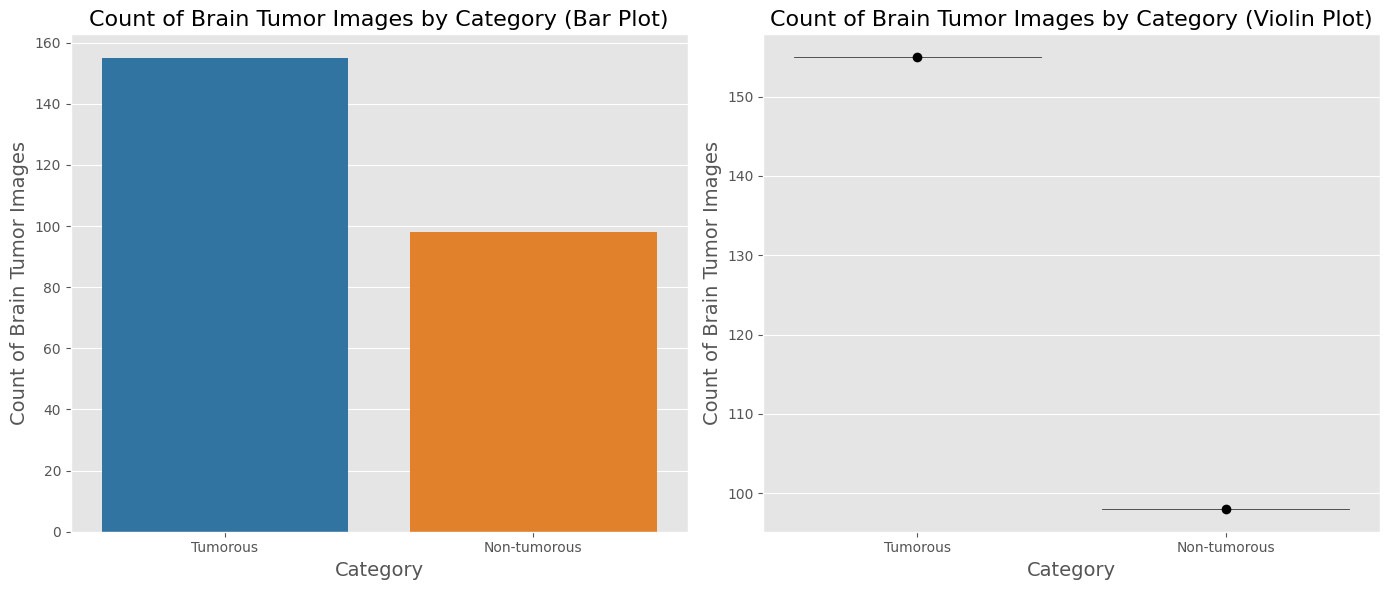

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {'Category': ['Tumorous', 'Non-tumorous'],
        'Count': [number_files_yes, number_files_no]}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot with custom colors
sns.barplot(x='Category', y='Count', hue='Category', data=data, palette=['#1f77b4', '#ff7f0e'], ax=axes[0], legend=False)
axes[0].set_xlabel('Category', fontsize=14)
axes[0].set_ylabel('Count of Brain Tumor Images', fontsize=14)
axes[0].set_title('Count of Brain Tumor Images by Category (Bar Plot)', fontsize=16)

# Violin plot with custom colors
sns.violinplot(x='Category', y='Count', hue='Category', data=data, palette=['#1f77b4', '#ff7f0e'], ax=axes[1], legend=False)
axes[1].set_xlabel('Category', fontsize=14)
axes[1].set_ylabel('Count of Brain Tumor Images', fontsize=14)
axes[1].set_title('Count of Brain Tumor Images by Category (Violin Plot)', fontsize=16)

# Add swarm plot on top of the violin plot
sns.swarmplot(x='Category', y='Count', data=data, color='black', size=7, ax=axes[1])

plt.tight_layout()
plt.show()


In [9]:
# Data Augmentation
# 155(61%), 98(39%)
# imbalance

In [10]:
import tensorflow as tf
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [11]:
def timing(sec_elapsed):
    h = int(sec_elapsed / 3600)  # 3600 seconds in an hour
    m = int((sec_elapsed % 3600) / 60)  # 60 seconds in a minute
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"


In [12]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(os.path.join(file_dir, filename))  # Using os.path.join for file paths
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i = 0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format="jpg"):
            i += 1
            if i > n_generated_samples:
                break

In [13]:
import os
import time
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
    # Create the save directory if it doesn't exist
    os.makedirs(save_to_dir, exist_ok=True)

    for filename in os.listdir(file_dir):
        image = cv2.imread(os.path.join(file_dir, filename))
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i = 0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format="jpg"):
            i += 1
            if i > n_generated_samples:
                break

start_time = time.time()

yes_path = 'brain_tumor_dataset/yes'
no_path = 'brain_tumor_dataset/no'

augmented_data_path = 'augmented_data/'

augmented_data(file_dir=yes_path, n_generated_samples=6, save_to_dir=os.path.join(augmented_data_path, 'yes'))
augmented_data(file_dir=no_path, n_generated_samples=9, save_to_dir=os.path.join(augmented_data_path, 'no'))

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))


0:1:7.626473426818848


In [14]:
import os

def data_summary(main_path):
    yes_path = os.path.join(main_path, "augmented_data/yes/")
    no_path = os.path.join(main_path, "augmented_data/no/")

    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))

    n = n_pos + n_neg

    pos_per = (n_pos * 100) / n
    neg_per = (n_neg * 100) / n

    print(f"Number of samples: {n}")
    print(f"Number of positive samples: {n_pos} ({pos_per:.2f}%)")
    print(f"Number of negative samples: {n_neg} ({neg_per:.2f}%)")


In [15]:
def data_summary(main_path):
    yes_path = os.path.join(main_path, "yes/")  # Remove the extra 'augmented_data/'
    no_path = os.path.join(main_path, "no/")  # Remove the extra 'augmented_data/'

    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))

    n = n_pos + n_neg

    pos_per = (n_pos * 100) / n
    neg_per = (n_neg * 100) / n

    print(f"Number of samples: {n}")
    print(f"Number of positive samples: {n_pos} ({pos_per:.2f}%)")
    print(f"Number of negative samples: {n_neg} ({neg_per:.2f}%)")

# Call the function with just the base directory
data_summary('augmented_data/')

Number of samples: 2063
Number of positive samples: 1085 (52.59%)
Number of negative samples: 978 (47.41%)


In [16]:
listyes = os.listdir("augmented_data/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)

1085
978


C:\Users\ompat\AppData\Local\Temp\ipykernel_19408\1916958629.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=data, palette=colors, ax=ax)


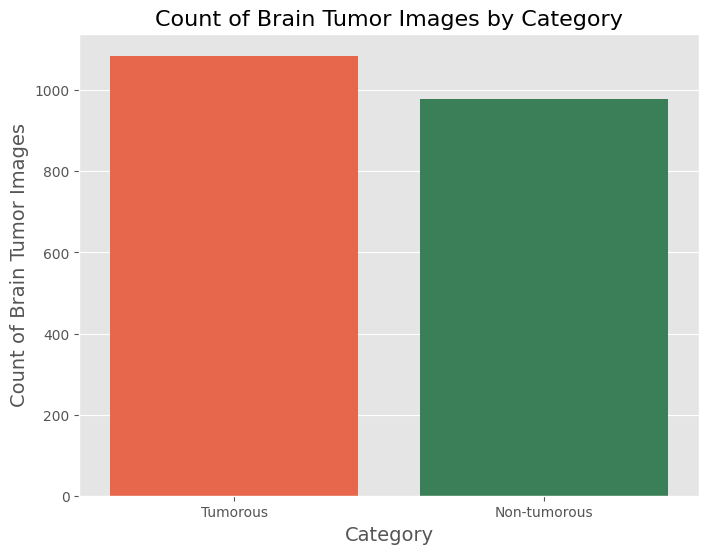

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {'Category': ['Tumorous', 'Non-tumorous'],
        'Count': [number_files_yes, number_files_no]}

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Custom colors for the categories
colors = ['#FF5733', '#2E8B57']

# Create the bar plot
sns.barplot(x='Category', y='Count', data=data, palette=colors, ax=ax)

# Add labels and title
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Count of Brain Tumor Images', fontsize=14)
ax.set_title('Count of Brain Tumor Images by Category', fontsize=16)

# Show the plot
plt.show()


In [18]:
# Data Preprocessing

In [19]:
# Convert BGR TO GRAY
# GaussianBlur
# Threshold
# Erode
# Dilate
# Find Contours

In [20]:
!pip install imutils --user

In [21]:
import cv2
import imutils
import matplotlib.pyplot as plt

def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image


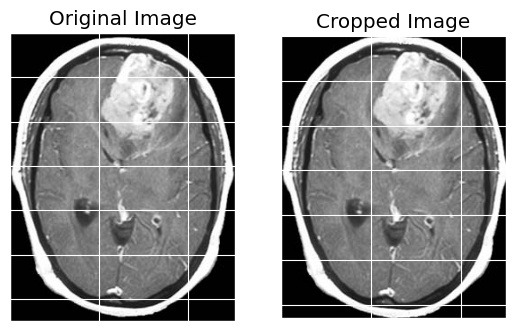

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [22]:
import cv2
import imutils
import matplotlib.pyplot as plt

def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image

# Load the image
img = cv2.imread('yes/Y169.jpg')

# Call the function to crop the brain tumor
crop_brain_tumor(img, True)


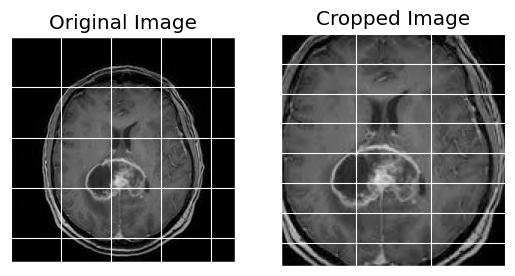

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]]], dtype=uint8)

In [23]:
import cv2
import imutils
import matplotlib.pyplot as plt

def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image

# Load the image
img = cv2.imread('yes/Y95.jpg')

# Call the function to crop the brain tumor
crop_brain_tumor(img, True)


In [24]:
# Define the crop_brain_tumor function
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    return new_image

# Set the folders
folder1 = 'augmented_data/no/'
folder2 = 'augmented_data/yes/'

# Loop through images in folder1
for filename in os.listdir(folder1):
    img = cv2.imread(os.path.join(folder1, filename))
    img = crop_brain_tumor(img, False)
    cv2.imwrite(os.path.join(folder1, filename), img)

# Loop through images in folder2
for filename in os.listdir(folder2):
    img = cv2.imread(os.path.join(folder2, filename))
    img = crop_brain_tumor(img, False)
    cv2.imwrite(os.path.join(folder2, filename), img)

In [25]:
# image loading

In [26]:
import numpy as np
from sklearn.utils import shuffle

# Define the crop_brain_tumor function
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    return new_image

def load_data(dir_list, image_size):
    X=[]
    y=[]

    image_width, image_height=image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(os.path.join(directory, filename))
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)

    X,y = shuffle(X,y)
    print(f"Number of examples: {len(X)}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    return X,y


In [27]:
augmented_path = 'augmented_data/'
augmeneted_yes = augmented_path + 'yes'
augmeneted_no = augmented_path + 'no'

IMAGE_WIDTH, IMAGE_HEIGHT = (240,240)

X,y = load_data([augmeneted_yes, augmeneted_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of examples: 2063
X shape: (2063, 240, 240, 3)
y shape: (2063,)


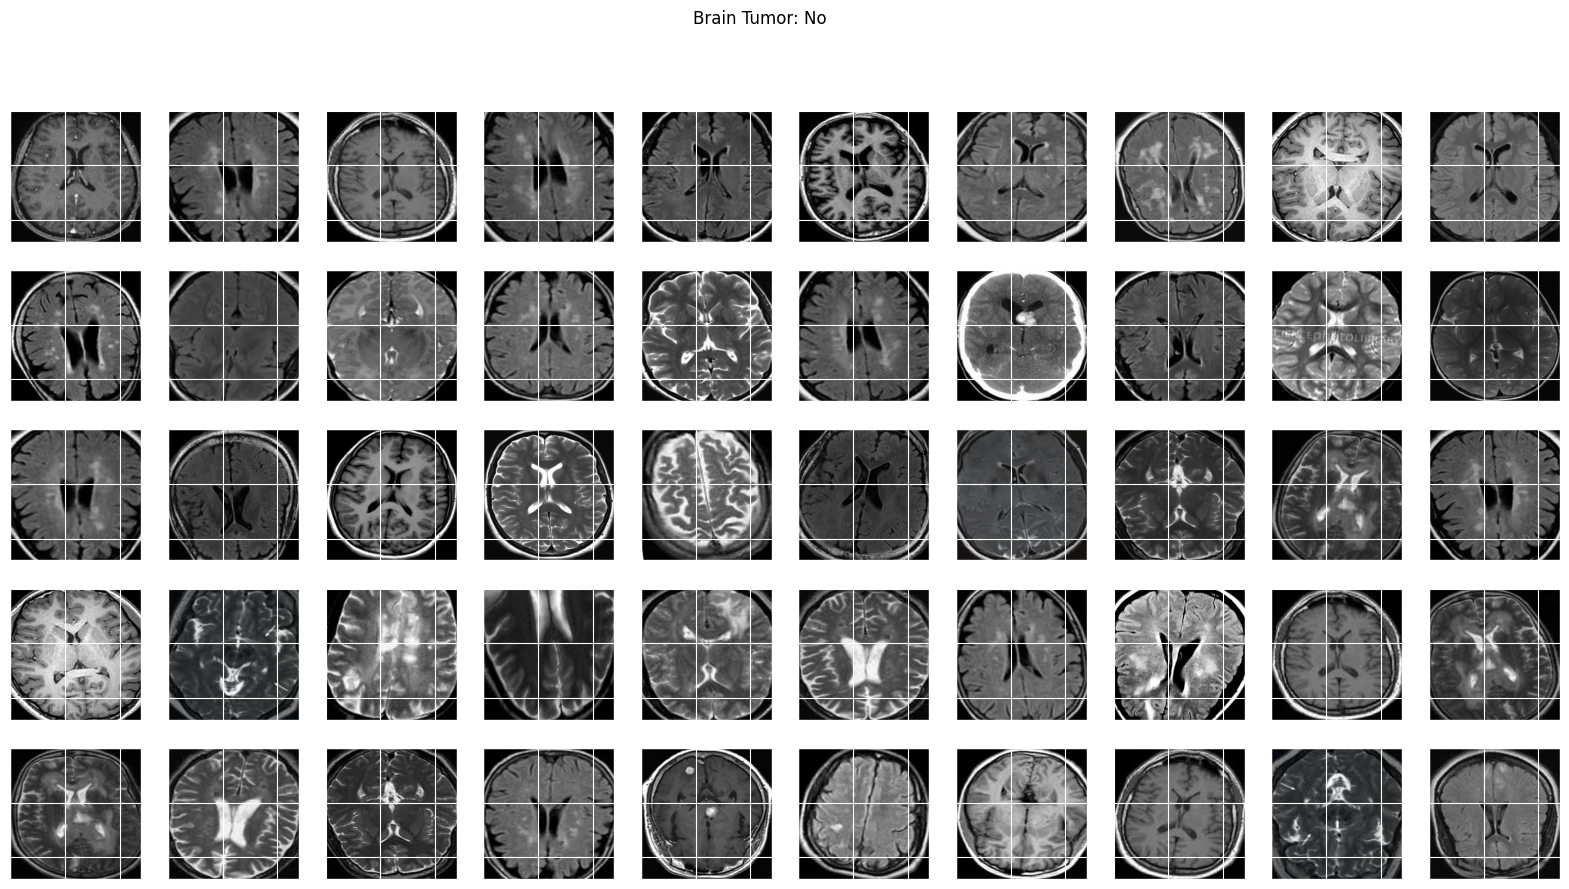

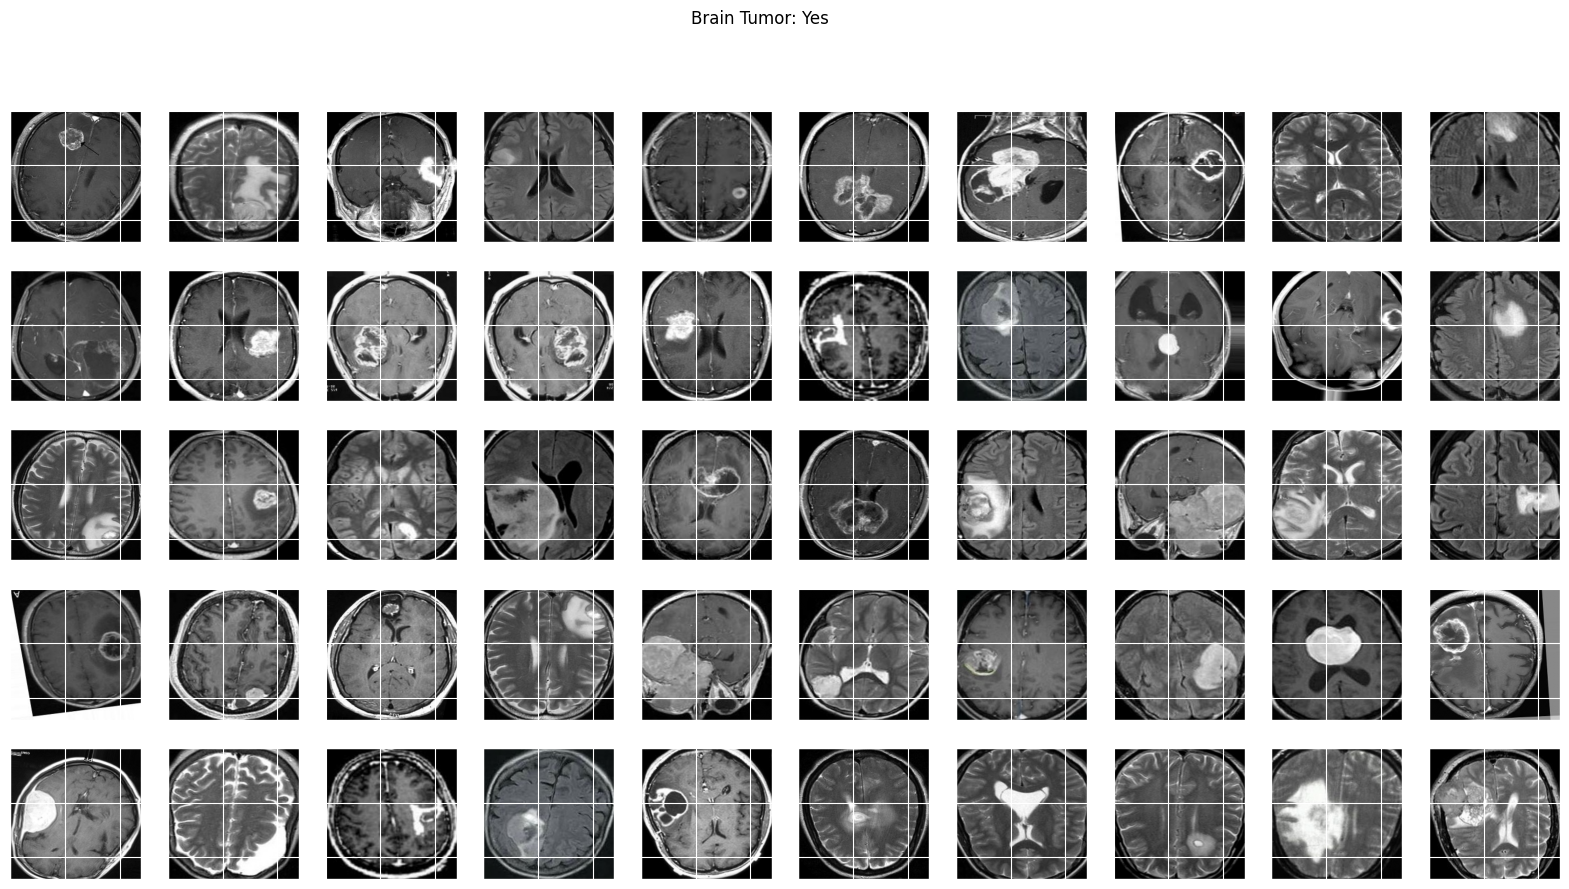

In [28]:
import matplotlib.pyplot as plt

def plot_sample_images(X, y, n=50):
    for label in [0, 1]:
        images = X[np.argwhere(y == label)][:n]  # Select first n images for each label
        columns_n = 10
        rows_n = (n + columns_n - 1) // columns_n  # Calculate number of rows needed

        plt.figure(figsize=(20, 10))

        for i, image in enumerate(images, start=1):
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image.squeeze())  # Squeeze the image to remove the singleton dimension

            plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)

        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

# Call the function
plot_sample_images(X, y)


In [29]:
# Data Spliting
# Train
# Test
# Validation

In [30]:
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir = 'tumorous_and_nontumorous'
    os.mkdir(base_dir)

In [31]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join('tumorous_and_nontumorous', 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join('tumorous_and_nontumorous', 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join('tumorous_and_nontumorous', 'valid')
    os.mkdir(valid_dir)

In [32]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join('tumorous_and_nontumorous/train', 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join('tumorous_and_nontumorous/test', 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join('tumorous_and_nontumorous/valid', 'tumorous')
    os.mkdir(infected_valid_dir)

In [33]:

if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join('tumorous_and_nontumorous/train', 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join('tumorous_and_nontumorous/test', 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join('tumorous_and_nontumorous/valid', 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [34]:
original_dataset_tumorous = os.path.join('augmented_data', 'yes/')
original_dataset_nontumorous = os.path.join('augmented_data', 'no/')

In [35]:
files = os.listdir('augmented_data/yes/')
fnames = files[:759]

for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

In [36]:
files = os.listdir('augmented_data/yes/')
fnames = files[759:922]

for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_test_dir, fname)
    shutil.copyfile(src, dst)


In [37]:
files = os.listdir('augmented_data/yes/')
fnames = files[922:]  # Ensuring the loop stays within the bounds of the 'files' list

for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_valid_dir, fname)
    shutil.copyfile(src, dst)

In [38]:
# 80% 10% 10%

In [39]:
files = os.listdir('augmented_data/no/')
fnames = files[:686]

for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

In [40]:
files = os.listdir('augmented_data/no/')
fnames = files[686:833]

for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_test_dir, fname)
    shutil.copyfile(src, dst)

In [41]:
files = os.listdir('augmented_data/no/')
fnames = files[833:979]

for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)

In [42]:
# Model Buliding

In [43]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   fill_mode='nearest')

test_data_gen = ImageDataGenerator(rescale=1./255)

valid_data_gen = ImageDataGenerator(rescale=1./255)


In [44]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/',
                                                    batch_size=32,
                                                    target_size=(240, 240),
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=42,
                                                    color_mode='rgb')


Found 1445 images belonging to 2 classes.


In [45]:
test_generator = test_data_gen.flow_from_directory('tumorous_and_nontumorous/test/',
                                                   batch_size=32,
                                                   target_size=(240, 240),
                                                   class_mode='categorical',
                                                   shuffle=True,
                                                   seed=42,
                                                   color_mode='rgb')


Found 310 images belonging to 2 classes.


In [46]:
valid_generator = valid_data_gen.flow_from_directory('tumorous_and_nontumorous/valid/',
                                                     batch_size=32,
                                                     target_size=(240, 240),
                                                     class_mode='categorical',
                                                     shuffle=True,
                                                     seed=42,
                                                     color_mode='rgb')


Found 308 images belonging to 2 classes.


In [47]:
class_labels = train_generator.class_indices
class_name = {value: key for key, value in class_labels.items()}


In [48]:
print(class_name)


{0: 'nontumorous', 1: 'tumorous'}


In [49]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the pre-trained VGG19 model with ImageNet weights
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Create the final model
model_01 = Model(base_model.input, output)
model_01.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the file path to save the model
filepath = 'model.keras'

# Define the EarlyStopping callback
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=4)

# Define the ModelCheckpoint callback to save the best model
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True,
                     save_weights_only=False, mode='auto', save_freq='epoch')

# Define the ReduceLROnPlateau callback to adjust learning rate based on validation accuracy
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1,
                        factor=0.5, min_lr=0.0001)


In [51]:
from keras.optimizers import SGD
from keras.optimizers.schedules import ExponentialDecay

# Define learning rate decay schedule
initial_learning_rate = 0.0001
decay_steps = 10000  # Adjust as needed
decay_rate = 0.96  # Adjust as needed

def lr_schedule(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)

# Wrap lr_schedule in ExponentialDecay
lr_scheduler = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)

sgd = SGD(learning_rate=lr_scheduler, momentum=0.9, nesterov=True)
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [52]:
history_01 = model_01.fit(train_generator, steps_per_epoch=len(train_generator), epochs=30, callbacks=[es,cp,lrr], validation_data=valid_generator)


Epoch 1/30


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5608 - loss: 0.7058
Epoch 1: val_loss improved from inf to 0.63472, saving model to model.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 284s 6s/step - accuracy: 0.5612 - loss: 0.7055 - val_accuracy: 0.6299 - val_loss: 0.6347 - learning_rate: 9.9981e-05
Epoch 2/30


C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss did not improve from 0.63472
46/46 ━━━━━━━━━━━━━━━━━━━━ 31s 673ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6299 - val_loss: 0.6347 - learning_rate: 9.9981e-05
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6061 - loss: 0.6674
Epoch 3: val_loss improved from 0.63472 to 0.59341, saving model to model.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.6060 - loss: 0.6675 - val_accuracy: 0.7143 - val_loss: 0.5934 - learning_rate: 9.9962e-05
Epoch 4/30

Epoch 4: val_loss improved from 0.59341 to 0.59341, saving model to model.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 860ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7143 - val_loss: 0.5934 - learning_rate: 9.9962e-05
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6492 - loss: 0.6251
Epoch 5: val_loss improved from 0.59341 to 0.57831, saving model to model.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step - accuracy: 0.6491 - loss: 0.6252 - val_ac

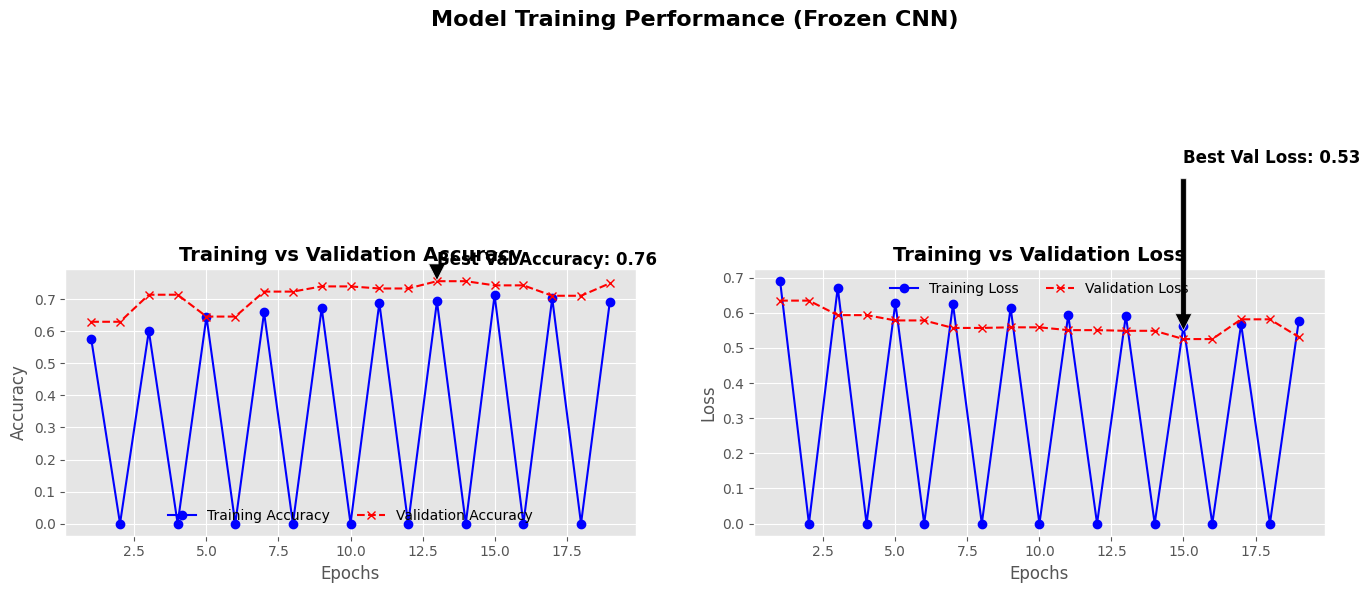

In [53]:
# Plot performance
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle("Model Training Performance (Frozen CNN)", fontsize=16, fontweight='bold')

# Prepare epoch list
max_epoch = len(history_01.history['accuracy']) + 1
epochs_list = list(range(1, max_epoch))

# Plot accuracy
ax1.plot(epochs_list, history_01.history['accuracy'], color='blue', linestyle='-', marker='o', label='Training Accuracy')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='red', linestyle='--', marker='x', label='Validation Accuracy')
ax1.set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)
ax1.grid(True)

# Annotate best validation accuracy
best_epoch = epochs_list[np.argmax(history_01.history['val_accuracy'])]
best_val_acc = max(history_01.history['val_accuracy'])
ax1.annotate(f'Best Val Accuracy: {best_val_acc:.2f}',
             xy=(best_epoch, best_val_acc),
             xytext=(best_epoch, best_val_acc + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, fontweight='bold')

# Plot loss
ax2.plot(epochs_list, history_01.history['loss'], color='blue', linestyle='-', marker='o', label='Training Loss')
ax2.plot(epochs_list, history_01.history['val_loss'], color='red', linestyle='--', marker='x', label='Validation Loss')
ax2.set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
ax2.grid(True)

# Annotate best validation loss
best_epoch_loss = epochs_list[np.argmin(history_01.history['val_loss'])]
best_val_loss = min(history_01.history['val_loss'])
ax2.annotate(f'Best Val Loss: {best_val_loss:.2f}',
             xy=(best_epoch_loss, best_val_loss),
             xytext=(best_epoch_loss, best_val_loss + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("enhanced_training_performance.jpeg", format='jpeg', dpi=100, bbox_inches='tight')
plt.show()


In [54]:
# Ensure the 'model_weights' directory exists, and if not, create it
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Save the model weights
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)


In [55]:
# Load the saved model weights
model_01.load_weights("model_weights/vgg19_model_01.weights.h5")

# Evaluate the model on the validation dataset
vgg_val_eval_01 = model_01.evaluate(valid_generator)

# Evaluate the model on the test dataset
vgg_test_eval_01 = model_01.evaluate(test_generator)


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.7456 - loss: 0.5375


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5946 - loss: 0.6448


In [56]:
# Load the saved model weights
model_01.load_weights("model_weights/vgg19_model_01.weights.h5")

# Evaluate the model on the validation dataset
vgg_val_eval_01 = model_01.evaluate(valid_generator)

# Evaluate the model on the test dataset
vgg_test_eval_01 = model_01.evaluate(test_generator)

# Print the evaluation results
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.7697 - loss: 0.5066
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5987 - loss: 0.6390
Validation Loss: 0.5311793088912964
Validation Acc: 0.75
Testing Loss: 0.6488890051841736
Testing Acc: 0.5838709473609924


In [57]:
# Get the filenames from the test generator
filenames = test_generator.filenames

# Determine the number of samples
nb_sample = len(filenames)

# Predict the classes of the test data
vgg_prediction_01 = model_01.predict(test_generator, steps=len(test_generator), verbose=1)

# Get the predicted class indices
y_pred = np.argmax(vgg_prediction_01, axis=1)


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step


In [58]:
# Increamental unfreezing and fine tuning

In [59]:
# Load the VGG19 model without the top classification layer
base_model = VGG19(include_top=False, input_shape=(240, 240, 3))

# Extract the names of all layers in the base model
base_model_layer_names = [layer.name for layer in base_model.layers]

# Print the layer names
base_model_layer_names


['input_layer_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [60]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights('model_weights/vgg19_model_01.weights.h5')

set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

print(model_02.summary())


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [61]:
from keras.optimizers import SGD
from keras.optimizers import legacy

# # Use the legacy optimizer
# sgd = legacy.SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)

# model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

from tensorflow.keras.optimizers import SGD

# Use the new optimizer
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])



C:\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [62]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs=30, callbacks=[es,cp,lrr], validation_data=valid_generator)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6809 - loss: 0.5785
Epoch 1: val_loss did not improve from 0.52527
10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 0.6792 - loss: 0.5785 - val_accuracy: 0.7370 - val_loss: 0.5426 - learning_rate: 1.0000e-04
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7180 - loss: 0.6016
Epoch 2: val_loss did not improve from 0.52527
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 8s/step - accuracy: 0.7190 - loss: 0.5985 - val_accuracy: 0.7403 - val_loss: 0.5354 - learning_rate: 1.0000e-04
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6796 - loss: 0.5801
Epoch 3: val_loss improved from 0.52527 to 0.51874, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 9s/step - accuracy: 0.6840 - loss: 0.5773 - val_accuracy: 0.7370 - val_loss: 0.5187 - learning_rate: 1.0000e-04
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7078 - loss: 0.5380
Epoch 4: val_loss improved from 0.51874 to 0.51695, saving model 

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 5: val_loss did not improve from 0.51695
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.7454 - loss: 0.5213 - val_accuracy: 0.7403 - val_loss: 0.5424 - learning_rate: 1.0000e-04
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6884 - loss: 0.5905
Epoch 6: val_loss did not improve from 0.51695
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.6878 - loss: 0.5917 - val_accuracy: 0.7532 - val_loss: 0.5182 - learning_rate: 1.0000e-04
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7010 - loss: 0.5736
Epoch 7: val_loss did not improve from 0.51695
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 8s/step - accuracy: 0.7023 - loss: 0.5720 - val_accuracy: 0.7597 - val_loss: 0.5184 - learning_rate: 1.0000e-04
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7684 - loss: 0.5078
Epoch 8: val_loss improved from 0.51695 to 0.51519, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 96s 10s/step - accuracy: 0.7673 - loss: 0.5080 - val_accuracy: 0.7597 - v

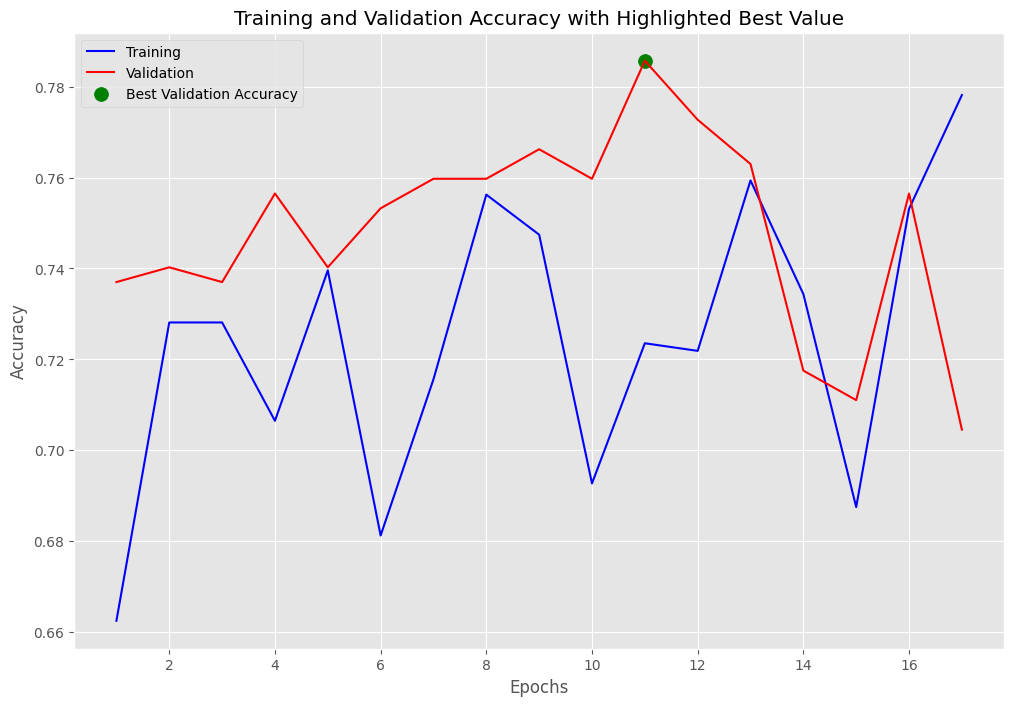

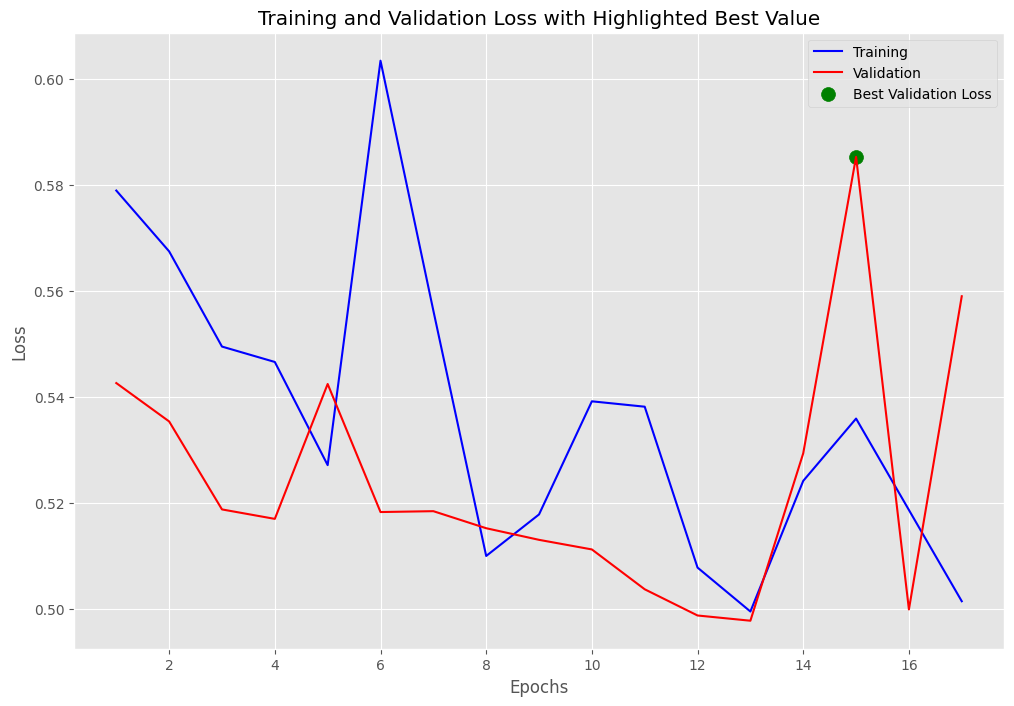

In [63]:
# Plot performance with advanced visualization
import seaborn as sns

# Define a function to plot training history with advanced features
def plot_training_history_advanced(history, metric):
    plt.figure(figsize=(12, 8))

    # Plot training and validation metric
    sns.lineplot(x=range(1, len(history.history[metric]) + 1), y=history.history[metric], label='Training', color='blue')
    sns.lineplot(x=range(1, len(history.history['val_' + metric]) + 1), y=history.history['val_' + metric], label='Validation', color='red')

    # Highlight the best validation metric
    best_val_metric = max(history.history['val_' + metric])
    best_epoch = history.history['val_' + metric].index(best_val_metric) + 1
    plt.scatter(best_epoch, best_val_metric, color='green', marker='o', s=100, label=f'Best Validation {metric.capitalize()}')

    # Add labels and title
    plt.title(f'Training and Validation {metric.capitalize()} with Highlighted Best Value')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot training and validation accuracy with advanced features
plot_training_history_advanced(history_02, 'accuracy')

# Plot training and validation loss with advanced features
plot_training_history_advanced(history_02, 'loss')


In [64]:
# Save model weights
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)


In [65]:
# Load model weights
model_02.load_weights("model_weights/vgg19_model_02.weights.h5")

# Evaluate model on validation and test data
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6916 - loss: 0.5738
10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 9s/step - accuracy: 0.5925 - loss: 0.6285


In [66]:
# Unfreezing the entire network

In [67]:
# Load the VGG19 base model
base_model = VGG19(include_top=False, input_shape=(240,240,3))

# Get the names of all layers in the base model
base_model_layer_names = [layer.name for layer in base_model.layers]

# Define the network architecture for model_03
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Create model_03
model_03 = Model(base_model.inputs, output)

# Load weights from model_02
model_03.load_weights('model_weights/vgg19_model_02.weights.h5')

# Compile model_03
sgd = SGD(learning_rate=0.0001, weight_decay=1e-6, momentum=0.9, nesterov=True) # Replace 'decay' with 'weight_decay'
model_03.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [68]:
# Display the summary of model_03
model_03.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 30, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.7578 - loss: 0.4924 
Epoch 1: val_loss improved from 0.49771 to 0.47376, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 288s 26s/step - accuracy: 0.7563 - loss: 0.4932 - val_accuracy: 0.7468 - val_loss: 0.4738 - learning_rate: 1.0000e-04
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.7502 - loss: 0.4837 
Epoch 2: val_loss did not improve from 0.47376
10/10 ━━━━━━━━━━━━━━━━━━━━ 240s 24s/step - accuracy: 0.7488 - loss: 0.4856 - val_accuracy: 0.7403 - val_loss: 0.5063 - learning_rate: 1.0000e-04
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.7882 - loss: 0.4400 
Epoch 3: val_loss did not improve from 0.47376
10/10 ━━━━━━━━━━━━━━━━━━━━ 228s 23s/step - accuracy: 0.7867 - loss: 0.4427 - val_accuracy: 0.7208 - val_loss: 0.5202 - learning_rate: 1.0000e-04
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.7366 - loss: 0.5475 
Epoch 4: val_loss improved from 0.47376 to 0.43033,

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 5: val_loss improved from 0.43033 to 0.42529, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 177s 17s/step - accuracy: 0.8179 - loss: 0.4640 - val_accuracy: 0.8117 - val_loss: 0.4253 - learning_rate: 1.0000e-04
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.8402 - loss: 0.4278 
Epoch 6: val_loss improved from 0.42529 to 0.41229, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 258s 26s/step - accuracy: 0.8385 - loss: 0.4293 - val_accuracy: 0.8052 - val_loss: 0.4123 - learning_rate: 1.0000e-04
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.8129 - loss: 0.4322 
Epoch 7: val_loss did not improve from 0.41229
10/10 ━━━━━━━━━━━━━━━━━━━━ 246s 25s/step - accuracy: 0.8101 - loss: 0.4368 - val_accuracy: 0.7727 - val_loss: 0.4272 - learning_rate: 1.0000e-04
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.7588 - loss: 0.4662 
Epoch 8: val_loss improved from 0.41229 to 0.40358, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━

In [71]:
# Add this code after the training is complete in the 'ipython-input-103-4432f1ce02d0' file:
model_03.save_weights("model_weights/vgg_unfrozen.weights.h5")

# Now you can load the weights in 'ipython-input-104-4432f1ce02d0' file:
model_03.load_weights("model_weights/vgg_unfrozen.weights.h5")
vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8165 - loss: 0.3916
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.7350 - loss: 0.4904


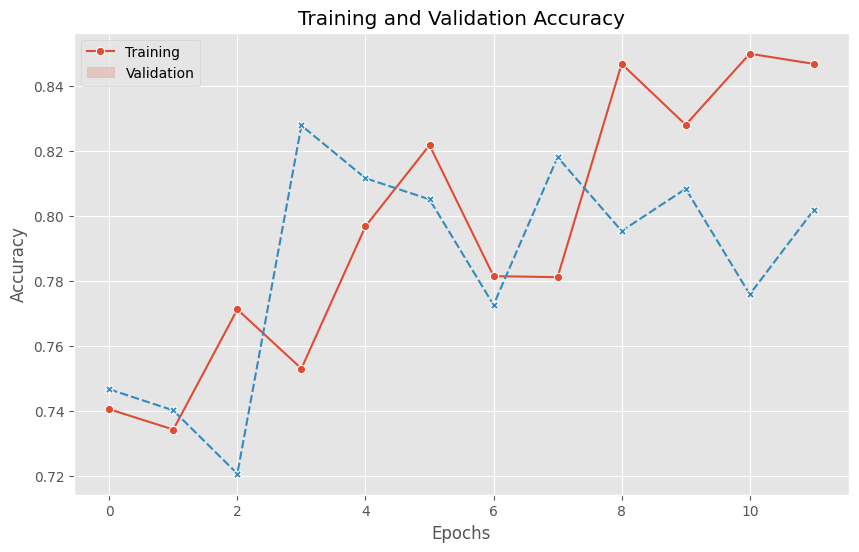

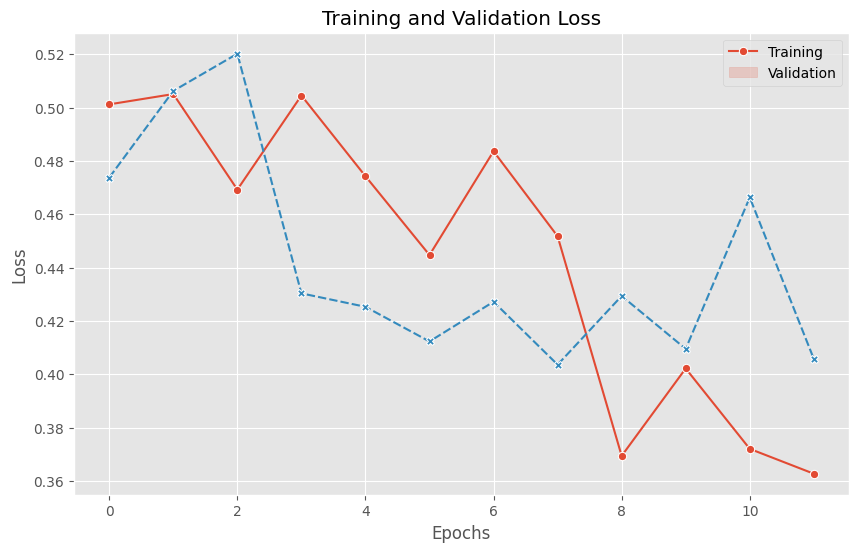

In [72]:
# Convert history to DataFrame
history_df = pd.DataFrame(history_03.history)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], markers=True)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['loss', 'val_loss']], markers=True)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.grid(True)
plt.show()